# Lab 4, K-Means: Financial Aid to Under-Developed Countries  by the HELP Foundation
-----------------------------------------------------------------------------------------------------------------------------
by: Matlotlo Dhlamini


# Table of Contents
--------------------------------------------------------
1. [Introduction](#Introduction)
   - [Dataset Description](#Dataset-Description)
   
2. [Problem Statement](#Problem-Statement)

3. [Data Import and Exploration](#Data-Import-and-Exploration)

4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
   - [Univariate Analysis: Exploring Distribution](#Univariate-Analysis:-Exploring-Distribution)
   - [Bivariate Analysis](#Bivariate-Analysis)
   - [Correlation Analysis](#Correlation-Analysis)

5. [Data Preprocessing](#Data-Preprocessing)

6. [Feature Engineering](#Feature-Engineering)
   - [Feature Scaling](#Feature-Scaling)
   - [Log Transformations](#Log-Transformations)
   - [Polynomial Features](#Polynomial-Features)
   - [Dimensionality Reduction: Principal Component Analysis](#Dimensionality-Reduction:-Principal-Component-Analysis)

7. [Modelling](#Modelling)
   - [Determining the Number of Clusters](#Determining-the-Number-of-Clusters)
   - [Model Training](#Model-Training)
   - [Clustering](#Clustering)

8. [Model Evaluation](#Model-Evaluation)
   - [Interpreting Clusters](#Interpreting-Clusters)
   - [Internal Metrics](#Internal-Metrics)

9. [Hyperparameter Tuning](#Hyperparameter-Tuning)
   - [GridSearch Method](#GridSearch-Method)
   - [RandomizedSearch Cross Validation](#RandomizedSearch-Cross-Validation)
   - [Discussion](#Discussion)

10. [Conclusion](#Conclusion)

11. [References](#References)





# 1. Introduction

The data is obtained from HELP International, a humanitarian organization aimed at eleviating poverty and socio-economic ills and providing financial relief to countries who may be in times of calamity.

The data to be used and explored was sourced from Kaggle on this link: https://www.kaggle.com/code/ensarerdogan/health-spending-with-hierarchical-clustering/input.




### Dataset Description:

- Country: Name of the country
- Child_mort: (Child mortality) Death of children under 5 years of age per 1000 live births
- Exports: Exports of goods and services per capita. Given as a percentage of the GDP per capita
- Health: Total health spending per capita. Given as a percentage of GDP per capita
- Imports: Imports of goods and services per capita. Given as a percentage of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- Life_expec: (Life expectancy) The average number of years a newborn child would live if the current mortality patterns are to remain the same
- Total_fer: (Total Fertility) The number of children that would be born to each woman if the current age-fertility rates remain the same
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

# 2. Problem Statement

The CEO of the humanitarian NGO has raised financial aid for countries who are in direct and dire need of aid.

Using this dataset, I seek to develop a model to determine the countries who may benefit from this aid considering economic indicators such as GDP per capita, income, mortality rates and health spending.

An unspupervided machine learning model will be used, namely the k-means clustering algorithm.

# 3. Data Import and Exploration

In [3]:
#Read in libraries
import pandas  as pd #Data manipulation
import numpy as np  #Data manipulation
import matplotlib.pyplot as plt  #Visualization
import seaborn as sns  #Visualization
from pandas.plotting import scatter_matrix  #Visualization
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler  #Feature Normalisation

from sklearn.model_selection import train_test_split  #Model Training
from sklearn.tree import RandomForestRegressor  #Selected Model

#Model evaluation


from sklearn.model_selection import GridSearchCV  #hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV


%matplotlib inline

In [4]:
df = pd.read_csv(f"""Country-data.csv""")

In [5]:
df.head()  #preview

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.set_index('country', inplace=True)

df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# 4. Exploratory Data Analysis (EDA)

### Data Overview:

In [7]:
df.shape

(167, 9)

There are 167 Rows and 9 Columns.

## data type

In [8]:
df.dtypes  #no conversions needed

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

### Data Summary

In [9]:
#Displaying the statistical summary of the dataset
summary =df.describe()
summary



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## <u>Visualizations</u>

## Univariate Analysis: Exploring Distribution

###                _Feature Box Plots_

Create a visualization of the features to see how the data is distributed:

<Axes: xlabel='gdpp'>

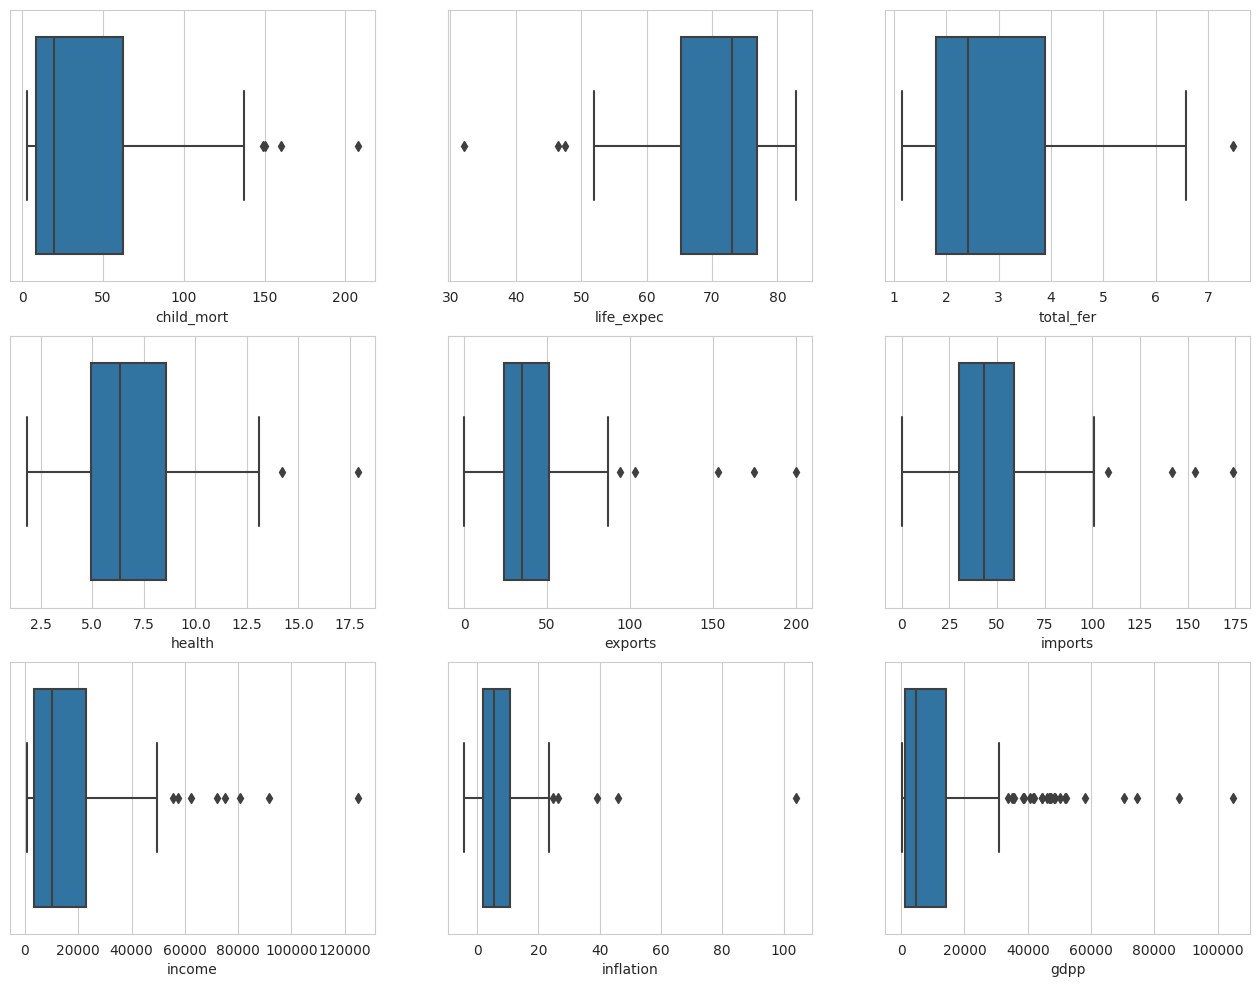

In [10]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='child_mort',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='life_expec',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='total_fer',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='health',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='exports',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='imports',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='income',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='inflation',data=df)
plt.subplot(3,3,9)
sns.boxplot(x='gdpp',data=df)

**_Observations:_**

- The following economic indicators are highly skewed with many outliers: income, inflation and gdpp. This is a possibbel indication of economic disaprities among the countries in the dataset. There is a presence of developing countries with low economic status as well as some developed countries with high economic resources and strength, hence the longer tail/whisker to the right and many outliers.

- Total fertility and child mortality show a similar distribution with a positive skwew.

- The life expectancy is skewed left with a few outliers. The outliers are indicative of less developed countries with a relatively low life expectancy in comparison to other countires in the population.

------------------------------------------------------------------------------------------------------------------

## Bivariate Analysis:

### _Data Scatter Matrix_ / _Pairplot_

Investigate the relationships of the data

<Figure size 2500x1800 with 0 Axes>

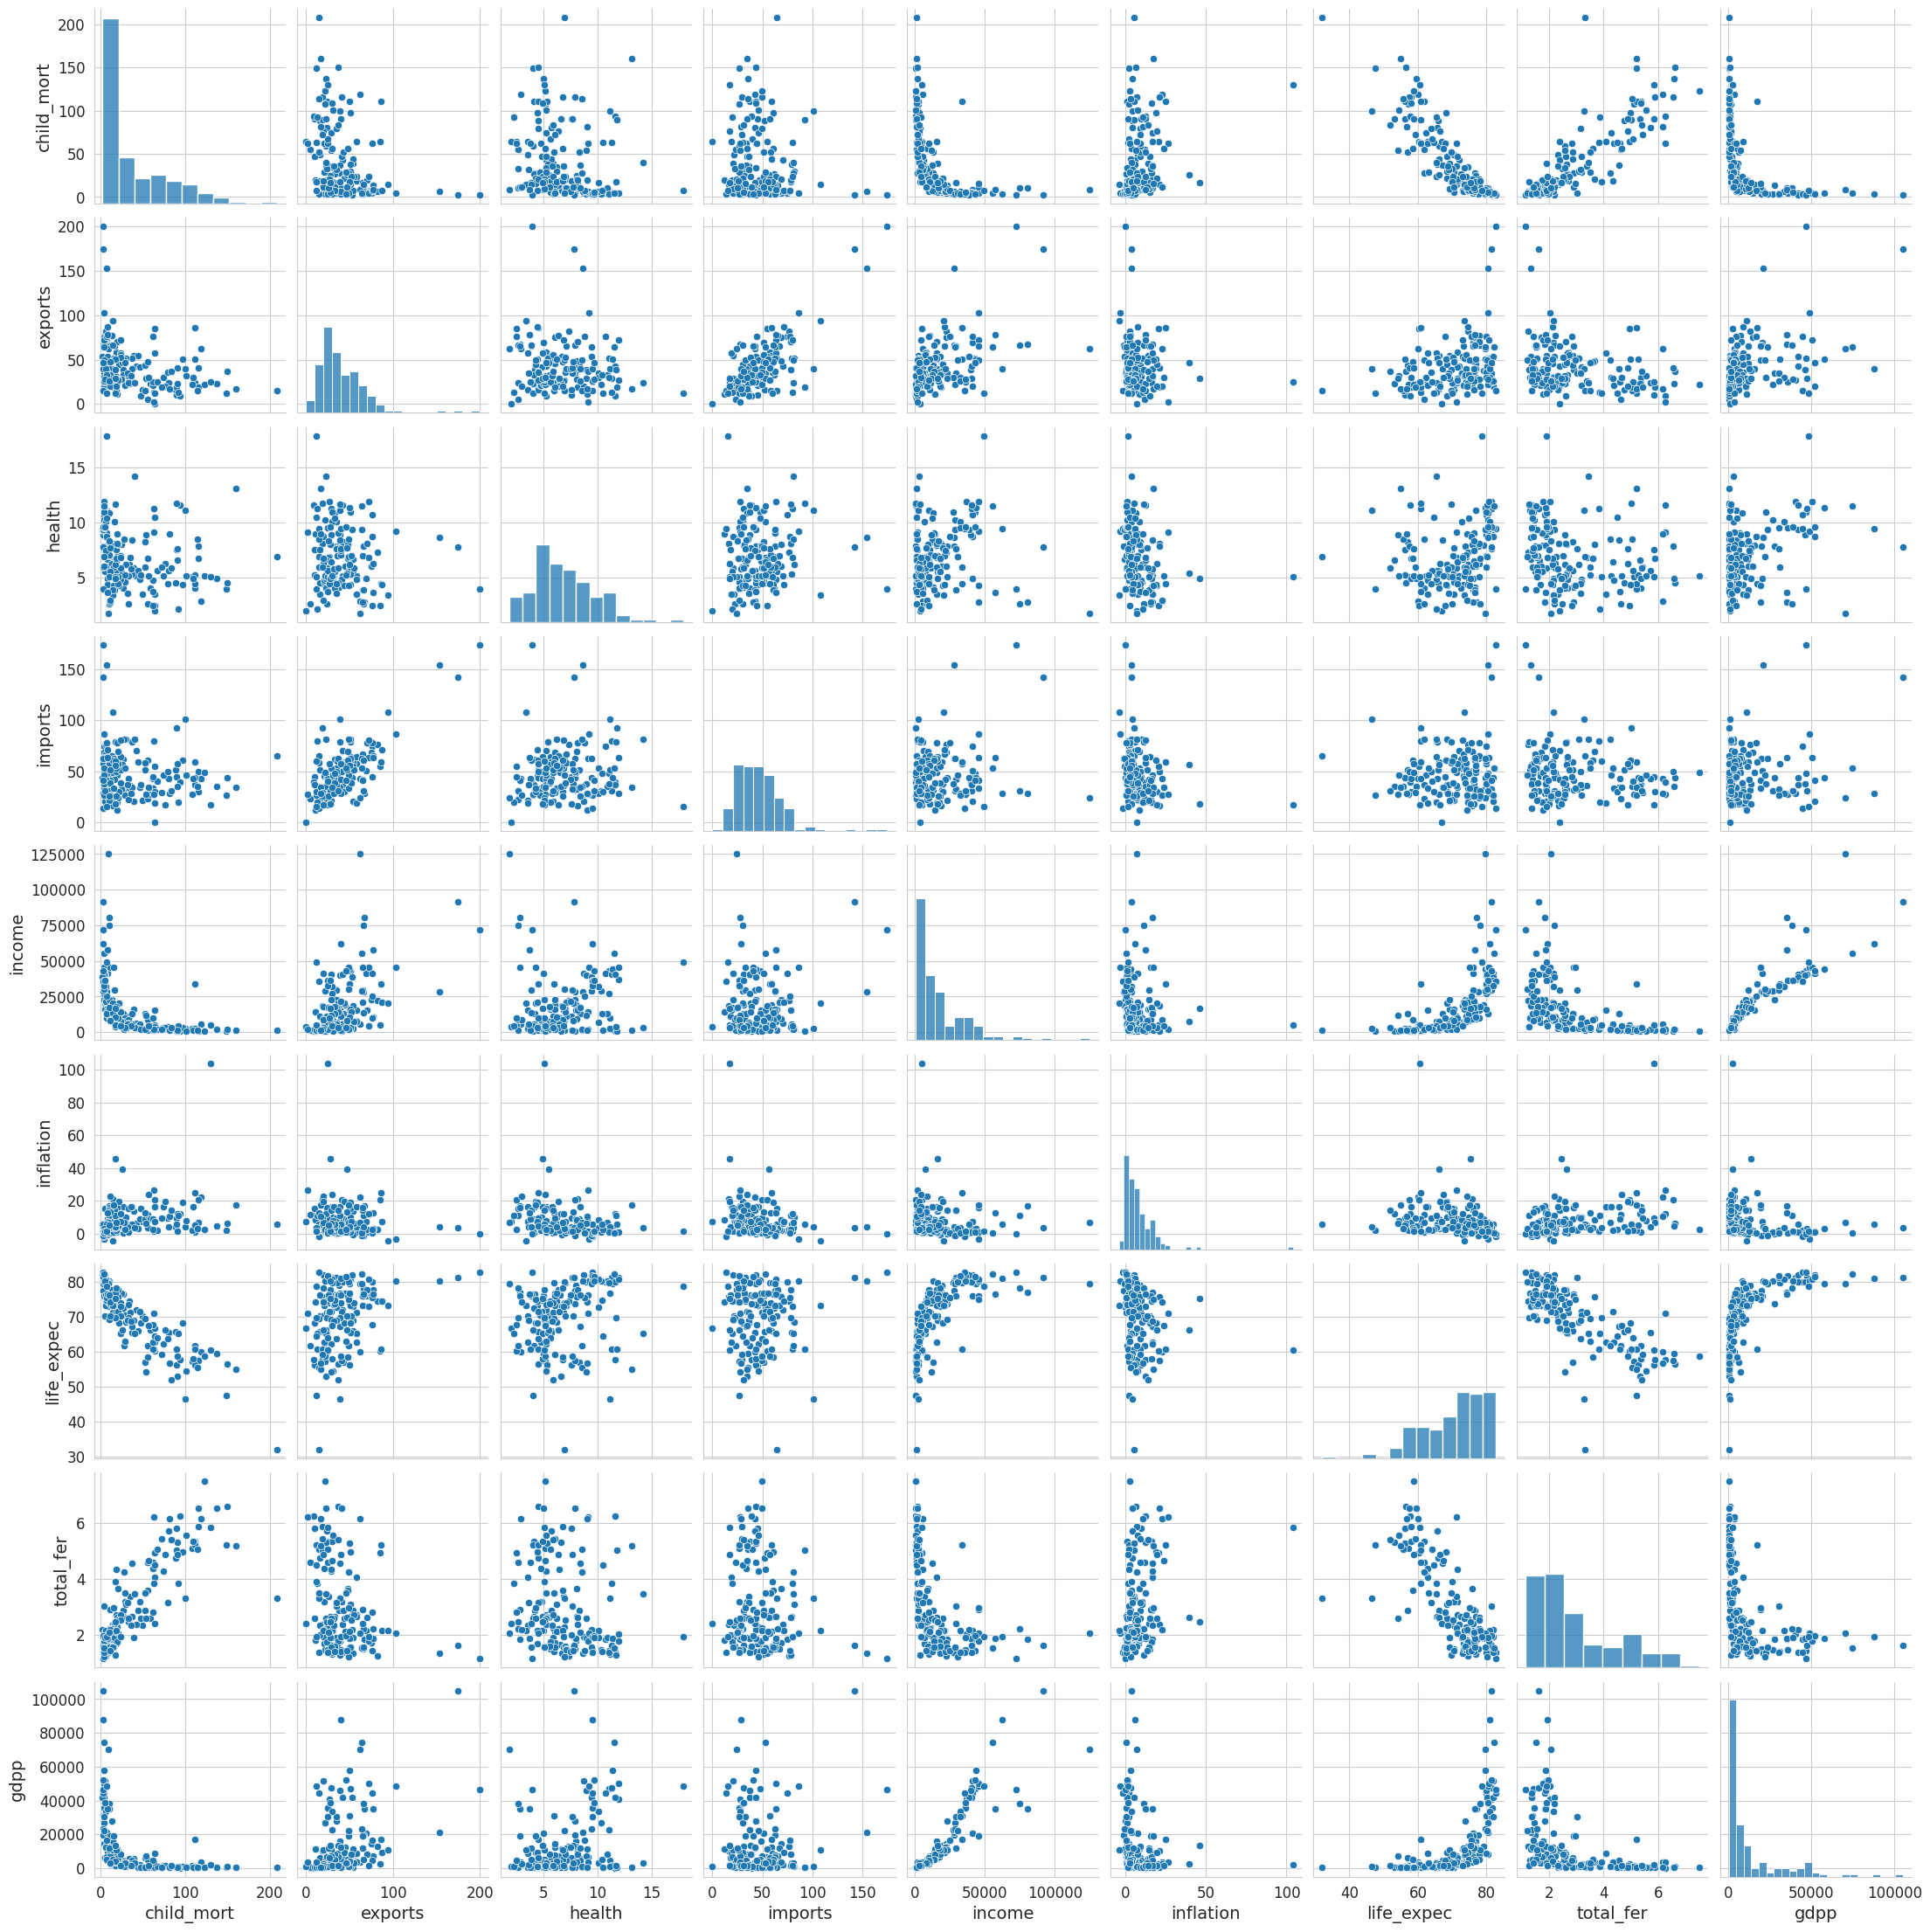

In [11]:
#scatter= scatter_matrix(df, figsize=(18,18)) #Have a general view of the distribution of the data

# Set global font size for labels
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.figure(figsize=(25, 18))
sns.pairplot(df)
plt.show()

# Reset font sizes back to default
plt.rcParams.update(plt.rcParamsDefault)


**_Observations:_**

There are some linear relationships that exists within the dataset.
There is a positive linear relationship between:
- Child mortality and Total fertility
- GDP per capita
- exports and imports

The following features have inversely proportional relationship to one another:
- Child mortality and Life expectancy
- Life expectancy and Total fertility

## Correlation Analysis

In [12]:
correlation_matrix=df.corr()
correlation_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


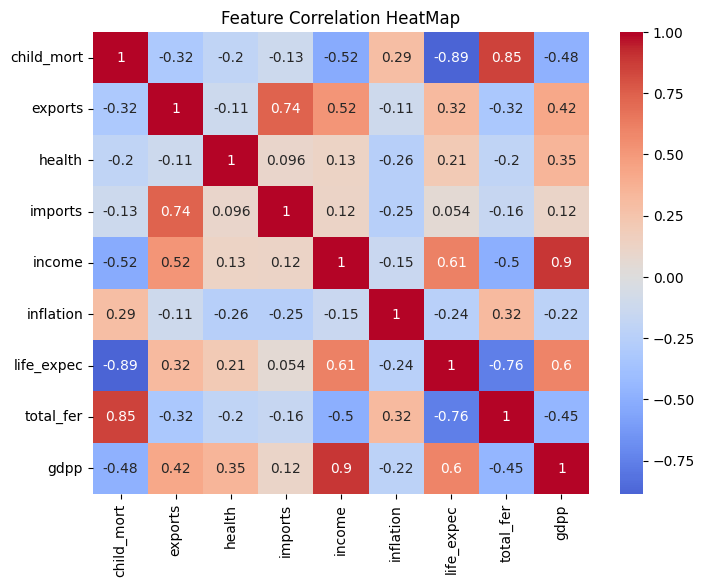

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation HeatMap')
plt.show()

There are a number of highly correlated features. High feature correlation can introduce multicollinearity. Highly correlated features may carry redundant information and can be grouped together in feature engineering.

# 5. Data Preprocessing

## Missing values

In [14]:
#missing values
missings=df.isna()
missings.sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing values in the dataset.

### Assess Duplicates:

In [15]:
duplicates = df.duplicated()

# Show duplicate rows
print("Duplicate Rows:")
print(df[duplicates])

Duplicate Rows:
Empty DataFrame
Columns: [child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


no duplicates observed

### Convert all percentages back to absolute values:

In [16]:
##The import, export and health spending are expressed as percentages of the GDPP, convert these back to their values:


df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [17]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 6. Feature Engineering

## Feature Scaling:

 **Scaling using the min-max scalar:**

In [18]:
countries = df.index.tolist()   #save the index to a list before scaling

In [19]:
# Scaling
scaler= MinMaxScaler()      #min max scaling was chosen as some gfeatures do not follow a gaussian distribution and have many outliers. Standard scalar is sensitive to outliers
scaled_features = scaler.fit_transform(df)

# dataframe of scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

In [20]:
scaled_df.index = countries   #reassign the index to the scaled dataset

In [21]:
scaled_df.head()
#scaled_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Afghanistan,0.426485,0.000295,0.003363,0.001661,0.008047,0.126144,0.475345,0.736593,0.003073
Albania,0.068160,0.006227,0.029486,0.013327,0.074933,0.080399,0.871795,0.078864,0.036833
Algeria,0.120253,0.009315,0.020017,0.009388,0.098809,0.187691,0.875740,0.274448,0.040365
Angola,0.566699,0.011963,0.010148,0.010152,0.042535,0.245911,0.552268,0.790221,0.031488
Antigua and Barbuda,0.037488,0.030204,0.083558,0.048190,0.148652,0.052213,0.881657,0.154574,0.114242


## Log Transformation:

Outliers influence the distribution of the data and often cause skewness in the data and thus affecting the model. K-means relies on mean to get the positioning of the centroid and outliers affect the mean value of the dataset. Therefore, log transformation can help lessen the effect of outliers on the dataset/ features of the dataset.

In [22]:
##Explore log transformation on skewed data
#adding 'l' infront of the feature to distinguish it as having being logged
scaled_df['Lgdpp'] = np.log1p(scaled_df['gdpp'])
scaled_df['Lincome'] = np.log1p(scaled_df['income'])
scaled_df['Linflation'] = np.log1p(scaled_df['inflation'])


In [23]:
#remove the non-logarithmic values for gdpp, income and inflation

scaled_df1 = scaled_df.drop(['gdpp','income','inflation'], axis = 1)

scaled_df1. head()
#scaled_df1.describe()

,child_mort,exports,health,imports,life_expec,total_fer,Lgdpp,Lincome,Linflation
Afghanistan,0.426485,0.000295,0.003363,0.001661,0.475345,0.736593,0.003069,0.008015,0.118799
Albania,0.068160,0.006227,0.029486,0.013327,0.871795,0.078864,0.036171,0.072258,0.077331
Algeria,0.120253,0.009315,0.020017,0.009388,0.875740,0.274448,0.039572,0.094227,0.172011
Angola,0.566699,0.011963,0.010148,0.010152,0.552268,0.790221,0.031003,0.041655,0.219867
Antigua and Barbuda,0.037488,0.030204,0.083558,0.048190,0.881657,0.154574,0.108174,0.138589,0.050896


## Polynomial Features:

Polynomial features of variables that are important in health and that may highlight extremes in the data were created.
Child mortality is one features that is reflective of the 'health' of a country, and by squaring it the effects of child mortality will be highlighted in the countries with extreme cases of child mortality.

Income and GDP per capita are highly correlated and intuitively, the more income recieved per person, the more gross domestic product per capita. These are variables that both speak to economic wealth and leaving these fetures as is may be redundant.


In [24]:
scaled_df1['child_mort2'] = scaled_df1['child_mort'] ** 2
scaled_df1['gpd_income'] = scaled_df1['Lgdpp']*scaled_df1['Lincome']
scaled_df1['exports_imports_interaction'] = scaled_df1['exports'] * scaled_df1['imports']

According to Data Camp, the K-means algorithm works well with features with the same/ similar means. I have observed that creating these new features, the high means of some features tended to reduce.

In [25]:
#Create new dataframe with the new features:
df1= scaled_df1.drop(['child_mort','exports','imports', 'Lincome', 'Lgdpp'], axis=1)

df1.head()

#df1.describe()

,health,life_expec,total_fer,Linflation,child_mort2,gpd_income,exports_imports_interaction
Afghanistan,0.003363,0.475345,0.736593,0.118799,0.181889,0.000025,4.901340e-07
Albania,0.029486,0.871795,0.078864,0.077331,0.004646,0.002614,8.298307e-05
Algeria,0.020017,0.875740,0.274448,0.172011,0.014461,0.003729,8.744901e-05
Angola,0.010148,0.552268,0.790221,0.219867,0.321148,0.001291,1.214492e-04
Antigua and Barbuda,0.083558,0.881657,0.154574,0.050896,0.001405,0.014992,1.455533e-03


## Dimensionality Reduction: Principal Component Analysis

$Note:$

Going forward the PCA and k-means Model can also be explored:
1. With the original data, ie no newly created features  (scaled_df)
2. With the original data but with the corrected skewed features using log  (scaled_df1)
3. With the data where new features were created  (df1)

### Model Features

In [26]:
X = df1.values  #features for the model ## The different data may be changed here
X

array([[3.36341972e-03, 4.75345168e-01, 7.36593060e-01, ...,
        1.81889376e-01, 2.45957494e-05, 4.90133955e-07],
       [2.94856458e-02, 8.71794872e-01, 7.88643533e-02, ...,
        4.64574312e-03, 2.61367853e-03, 8.29830697e-05],
       [2.00167874e-02, 8.75739645e-01, 2.74447950e-01, ...,
        1.44608236e-02, 3.72872288e-03, 8.74490122e-05],
       ...,
       [8.87582515e-03, 8.08678501e-01, 1.26182965e-01, ...,
        1.01564004e-02, 3.14795102e-04, 3.61063454e-05],
       [6.36206303e-03, 6.98224852e-01, 5.55205047e-01, ...,
        6.83514438e-02, 3.13996286e-04, 6.43727554e-06],
       [8.45852168e-03, 3.92504931e-01, 6.70347003e-01, ...,
        1.53599882e-01, 2.47769352e-04, 8.86485175e-06]])

### Initialise the PCA model

In [27]:
#initialise the PCA model, making the number of components

#number_features = len(df1.columns)
 #n_components=number_features

pca=PCA()
pca.fit(X)

PCA()

### Evaluate components

In [28]:
PCA(copy=True, n_components=None, whiten=False)
pca.components_

array([[-0.44133076, -0.49045156,  0.6687917 ,  0.08520582,  0.3099048 ,
        -0.10141487, -0.06177454],
       [ 0.82982348, -0.07554546,  0.42322802, -0.02158323,  0.24944566,
         0.18339377,  0.17390132],
       [ 0.07344799, -0.56455547, -0.59525735, -0.14464721,  0.54616816,
         0.0032557 ,  0.04814694],
       [-0.19179583, -0.04876678, -0.04368863,  0.28363787, -0.07828268,
         0.23007141,  0.90521599],
       [ 0.04702891,  0.19575213, -0.11174687,  0.8850557 ,  0.3293074 ,
         0.00474259, -0.234931  ],
       [ 0.22427865, -0.62482304, -0.0697609 ,  0.3255614 , -0.65371611,
        -0.05711246, -0.13353598],
       [-0.14807858, -0.06266056, -0.00132481, -0.03983794, -0.03898612,
         0.94860633, -0.26680271]])

In [29]:
#Explained variance ratio
pca.explained_variance_ratio_

#Explained variance
pca.explained_variance_

array([0.10553457, 0.03241172, 0.01105061, 0.00570854, 0.00483017,
       0.00377384, 0.00082835])

In [30]:
print (pca.explained_variance_ratio_)

[0.64296321 0.19746653 0.06732522 0.03477893 0.02942753 0.02299189
 0.0050467 ]


In [31]:
#Cumulative sum of variance explained with [n] features
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
variance

array([64.3, 84. , 90.7, 94.2, 97.1, 99.4, 99.9])

### The Cumulative variance plot

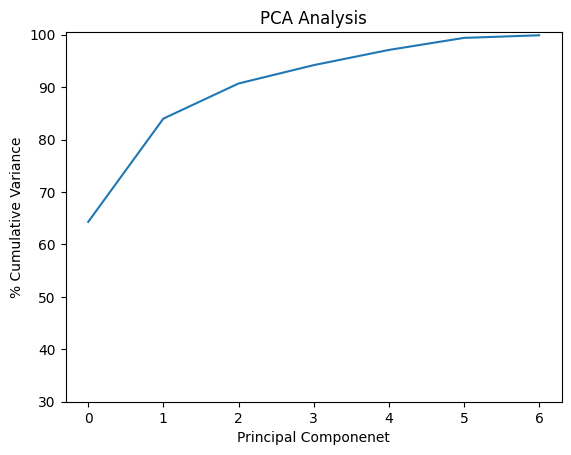

In [32]:
#plot the cumulative variance plot

plt.plot(variance)
plt.ylabel('% Cumulative Variance')
plt.xlabel('Principal Componenet')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.show()

### The Scree Plot

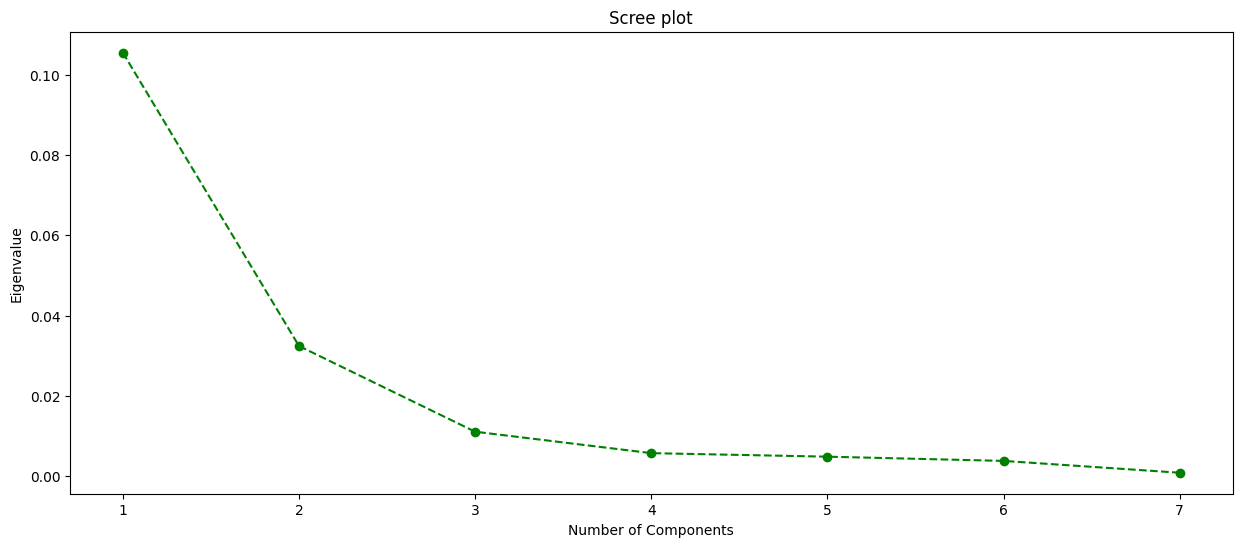

In [33]:
plt.figure(figsize=(15, 6))
components = np.arange(1, 8, step=1)
eigenvalues = pca.explained_variance_

plt.plot(components, eigenvalues, marker = 'o',
                 linestyle = '--', color = 'green')

plt.ylabel('Eigenvalue')
plt.xlabel('Number of Components')
plt.title('Scree plot')

plt.show()

* From the cumulative variance plot,it is not completely clear how many features to retain. It seems that the elbow is at two (2)features, i.e there are two features that explain significant variance in the data. However, the scree plot levels out at around three (3) to four (4) features, which mean that features 3 may also be able to better explain the variance in the data. About 95% of the variance in the data is captured with 3 features.

* The scree plot is clearer and demonstrates that the elbow levels off at around 3 components. Thus 3 components are to be retained in the model

**Using the information we have discovered, fit the PCA model to later use in the kmeans model**

In [34]:
pca=PCA(n_components= 3 )       #use 3 features as determined above
pca.fit(X)

PCA(n_components=3)

In [35]:
pca.transform(X)
scores_pca = pca.transform(X)

# 7. Modelling

## Determine the number of clusters

Choose the value of $k$. The elbow method helps to determine how many clusters to use

***The Elbow Curve***

The elbow curve seeks to minimize the within-cluster sum of squares.

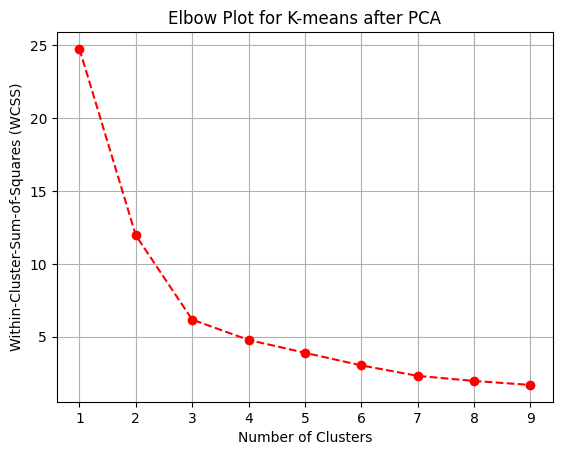

In [36]:
# Prepare a range of cluster numbers to evaluate
n_clusters_range = range(1, 10)

#List to store WCSS values
wcss = []

#Calculating WCSS for each number of clusters
for i in n_clusters_range:
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

# Plot the elbow plot
plt.plot(n_clusters_range, wcss, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.title('Elbow Plot for K-means after PCA')
plt.grid(True)
plt.show()





The elbow of the elbow-plot curves around 3 or 4 clusters. From my general knowledge of categorising socio-economic classes in communities, I will choose 3 clusters. It will be challenging to accuratley name more clusters, and may need a professional with more advanced domain knowledge.  

## Model Training:

In [37]:
optimal_clusters = 3 ##Refer to elbow curve and select accordingly   ## change according to optimization
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [38]:
clustered_data = kmeans.fit_predict(X)


### Assigning Cluster Names to the Data:

In [39]:
df1['Cluster'] = clustered_data  #assign the clusters to the dataset

## Clustering:

Use a scatter plot to visualize the clustered data


<ipython-input-40-afbd9ca3b800>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


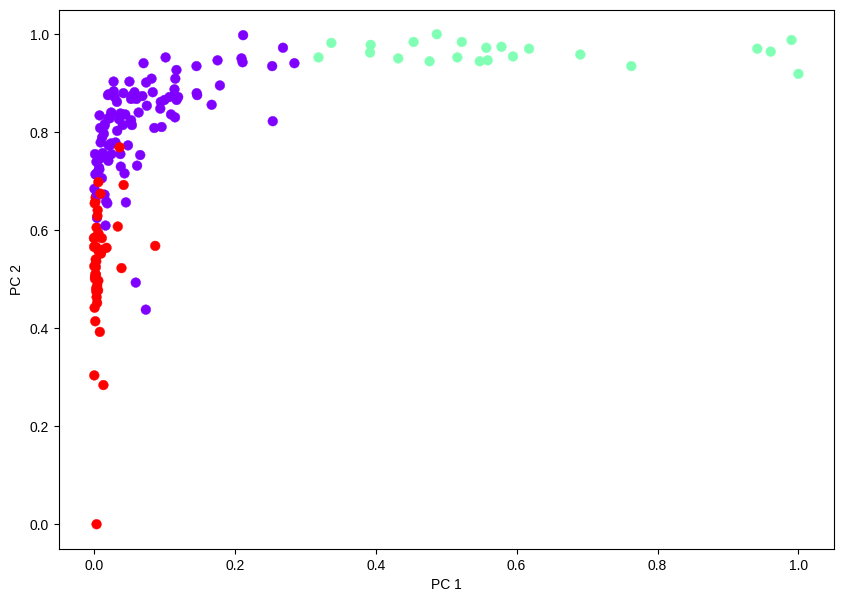

In [40]:
plt.figure('k-Means', figsize=(10,7))
plt.xlabel('PC 1')    #principle component 1
plt.ylabel('PC 2')    #principle component 2
plt.style.use('seaborn')
plt.scatter([X[:,0]], [X[:,1]], c=kmeans.labels_, cmap='rainbow')

plt.show()

# 8. Model Evaluation

## Interpreting Clusters:

In [41]:
# Get statistical description of each cluster

for i in range(optimal_clusters):
    print(f"Cluster {i}:")
    print(df1[df1['Cluster'] == i].describe())

Cluster 0:
           health  life_expec   total_fer  Linflation   child_mort2  \
count  100.000000  100.000000  100.000000  100.000000  1.000000e+02   
mean     0.065955    0.813393    0.169479    0.098464  1.366477e-02   
std      0.065131    0.096936    0.106351    0.059408  2.279071e-02   
min      0.000768    0.437870    0.000000    0.000000  9.481108e-07   
25%      0.019843    0.755424    0.071767    0.056086  1.351295e-03   
50%      0.044021    0.829389    0.160095    0.087797  4.814625e-03   
75%      0.095264    0.875740    0.235410    0.122219  1.376965e-02   
max      0.284619    0.998028    0.503155    0.380545  1.379902e-01   

       gpd_income  exports_imports_interaction  Cluster  
count  100.000000                   100.000000    100.0  
mean     0.019173                     0.004760      0.0  
std      0.044935                     0.027906      0.0  
min      0.000038                     0.000000      0.0  
25%      0.001358                     0.000057      0.0  
5

### Visualize the clusters:

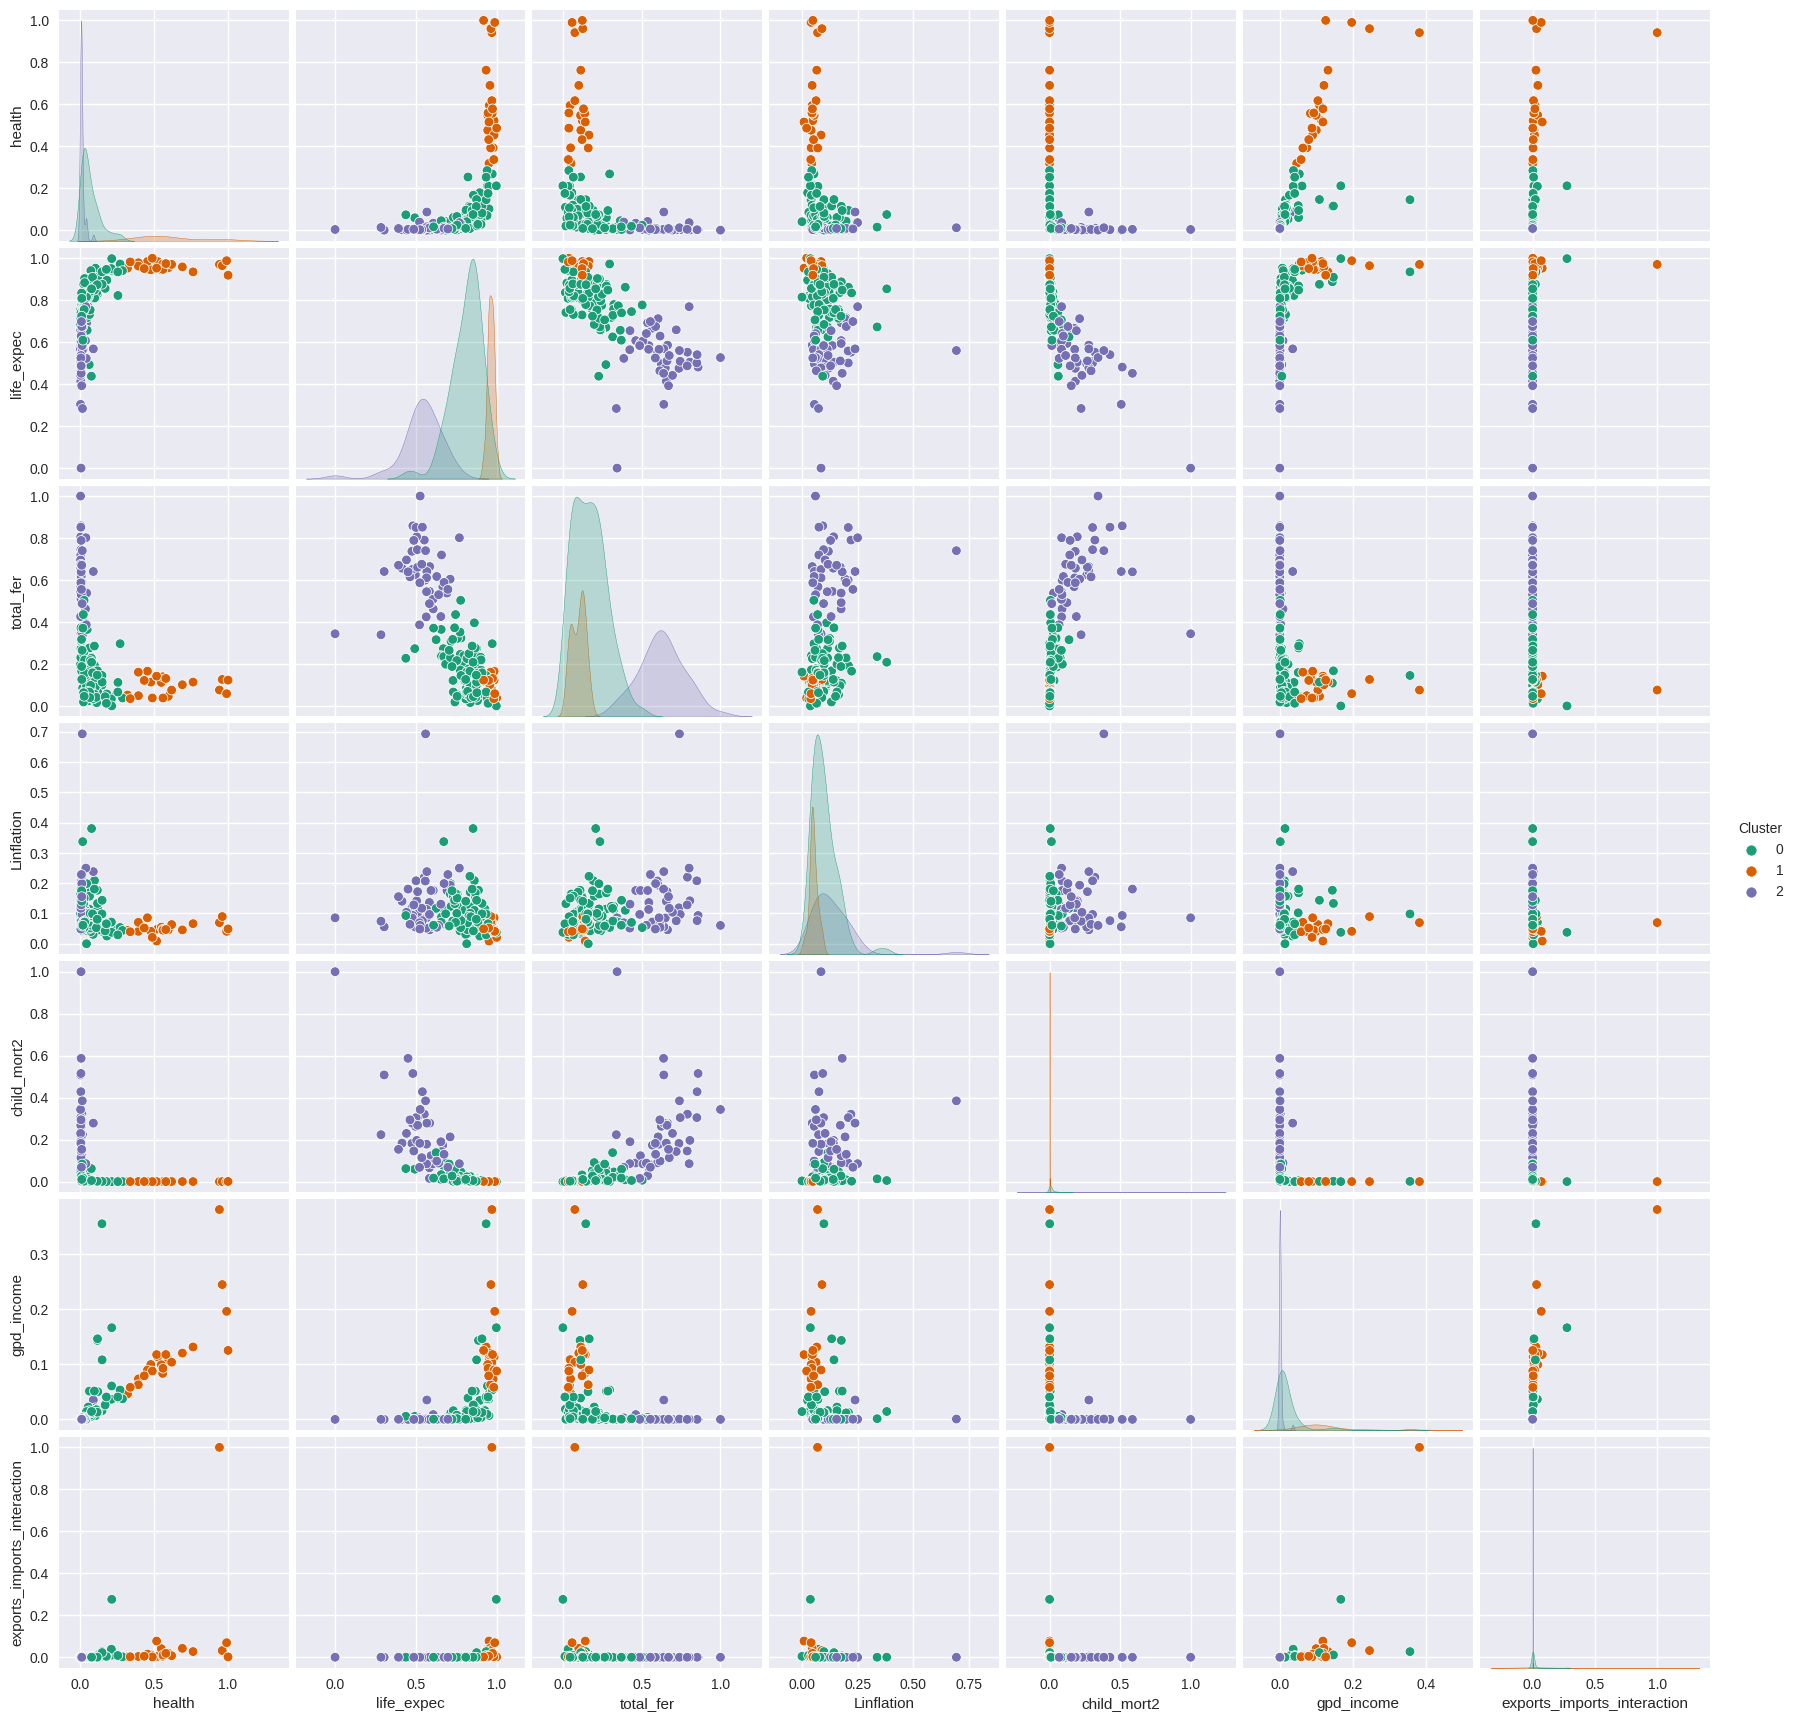

In [42]:
#Visualize the clusters:
sns.pairplot(df1, hue='Cluster', palette='Dark2', diag_kind='kde')
plt.show()

From the plot, it can be deduced that 'Cluster 2' generally has lower life expectancy, GDP per capita and income and has higher fertility and child mortality. These measurement characteristics are usually indicative of third world countries.

## Internal Metrics:

Internal metrics or internal evaluation is a method where the quality of how the model is clustered is based on internal information, i.e, the data labels. This is a measure of how well the model grouped of data into clusters using characteristics such as inter- and intra cluster distances.

The following internal metrics were used to evaluate the model:

* Within-Cluster Sum of Squares (WCSS): This method measures the squared average distance of all the points in a particular cluster relative to the cluster centroid of that cluster.

* Davies-Bouldin Index (DBI): The quality of clustering in this method is mesured by considering the separation bewteen the clusters as well as the compactness of clusters.

* Silhouette Score (SC): This measures how a data point fits into its own cluster/ how similar it is to its own cluster, compared to other clusters.

____________________________

 _**Within-Cluster Sum  of  Squares (WCSS):**_

In [43]:
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(X)  # X is your data
wcss = kmeans.inertia_
print("WCSS:", wcss)

WCSS: 8.658979814869497


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


_**Davies-Bouldin Index:**_

In [44]:
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
print("Davies-Bouldin Score:", davies_bouldin)


Davies-Bouldin Score: 0.6720590410378406


_**Silhouette Score:**_

In [45]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5185756654794837


# 9. Hyperparameter Tuning

## GridSearch Method

In [46]:
# Defining the parameter grid
param_grid = {
    'n_clusters': np.arange(1, 10),
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500],
    'n_init': [10, 20],
    'random_state': [0]
}

# Instantiating GridSearchCV object
#kmeans = KMeans()
grid_clf = GridSearchCV(kmeans, param_grid, cv=3)

# Fitting to the scaled data
grid_clf.fit(X)

# Printing the best parameters
print("Best Parameters: ", grid_clf.best_params_)



Best Parameters:  {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 9, 'n_init': 10, 'random_state': 0}


## RandomizedSearch Cross Validation

In [47]:
random_search = RandomizedSearchCV(kmeans, param_distributions=param_grid, n_iter=10, cv=3, random_state=0)

random_search.fit(X)
print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'random_state': 0, 'n_init': 10, 'n_clusters': 9, 'max_iter': 500, 'init': 'k-means++'}


In [48]:
best_kmeans = random_search.best_estimator_
best_kmeans.fit(X)


KMeans(max_iter=500, n_clusters=9, n_init=10, random_state=0)

## Silhouette Plot

**Create a plot with the average silhouette score against the number of clusters to see which cluster maximizes the score**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

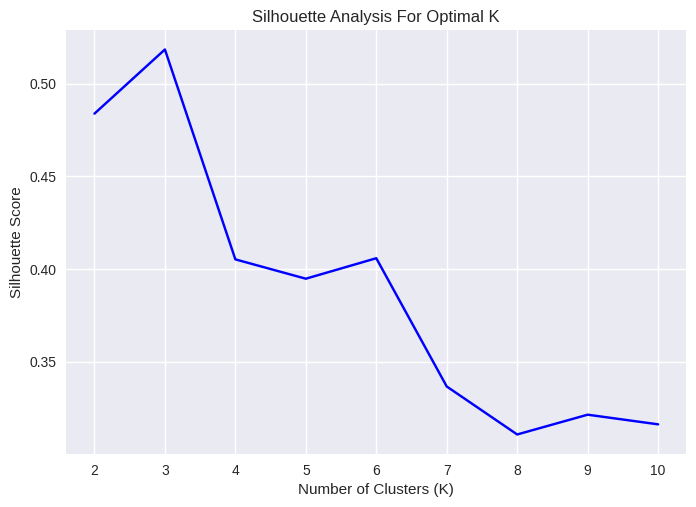

In [49]:
n_clusters = range(2, 11)
silhouette_avg = []

for num_clusters in n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.show()

## The Agglomerative Plot

### Use agglomerative clustering to determine the number of clusters and create a dendogram.

Compare the results with the K-means model:

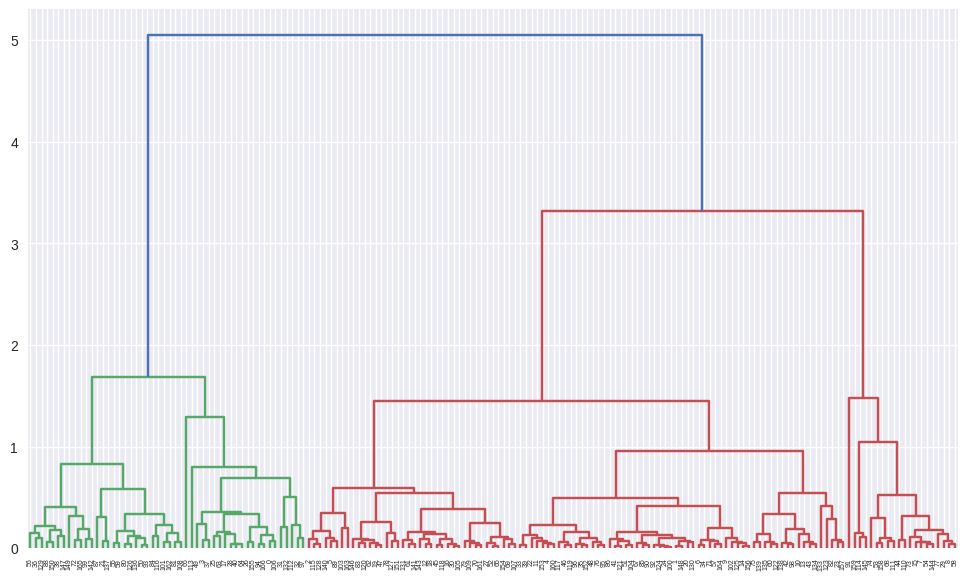

In [50]:
Z = sch.linkage(X, 'ward')
plt.figure(figsize=(12,7))
dendogram = sch.dendrogram(Z)

plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y = hc.fit_predict(X)

In [52]:
from sklearn import metrics
print(metrics.silhouette_score(X, y))

0.503709494633317


## Discussion


The clusters help us investigate the countries that are stuggling economically and have poor results in terms of health spending and health inicators such as child mortality.
Clustering helps identify the countries which may need health aid and support to improve the health economics in the country.

In [53]:
#Based on 3 clusters, cluster 2 indicates countries in need of aid, these countries are as follows:

countries_aid = df1[df1['Cluster']  == 2]
print(countries_aid)

                            health  life_expec  total_fer  Linflation  \
Afghanistan               0.003363    0.475345   0.736593    0.118799   
Angola                    0.010148    0.552268   0.790221    0.219867   
Benin                     0.002110    0.585799   0.664038    0.046010   
Burkina Faso              0.002998    0.508876   0.744479    0.096981   
Burundi                   0.001615    0.504931   0.805994    0.141997   
Cameroon                  0.006286    0.497041   0.624606    0.055015   
Central African Republic  0.000570    0.303748   0.640379    0.055889   
Chad                      0.003215    0.481262   0.858044    0.093452   
Comoros                   0.002527    0.666667   0.567823    0.072013   
Congo Dem. Rep.           0.001572    0.500986   0.850158    0.207928   
Congo Rep.                0.006310    0.558185   0.599369    0.207177   
Cote d'Ivoire             0.005992    0.477318   0.649842    0.084999   
Equatorial Guinea         0.087074    0.568047   0.

In [54]:
Intermediate_countries = df1[df1['Cluster']  == 0]    #Countries that are doing relatively well economically than the countries that need aid
No_aid_countires = df1[df1['Cluster']  == 1]   #Countries that have higher economic measures such as health spend, and gdp. These countries dont need aid

Create visualizations of the countries based on the clusters:

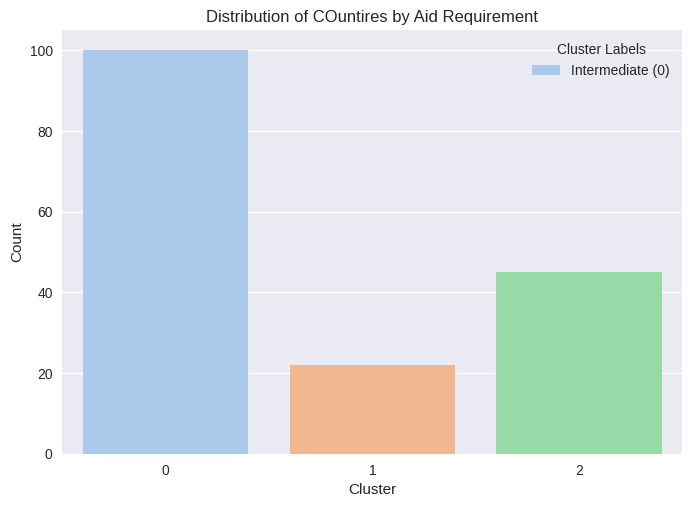

In [55]:
ax = sns.countplot(x='Cluster', data=df1, palette = 'pastel')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of COuntires by Aid Requirement')
legend_labels = ['Intermediate (0)', 'No Aid (1)', 'Need Aid (2)']
ax.legend(title='Cluster Labels', labels=legend_labels)

plt.show()

___Note:___

Cluster 0: Intermediate countries, these countries are not in dire need however may not necessarily be wealthy countries

Cluster 1: No aid countires. These countries are relatively weahtly and do not qualify for aid

Cluster 2: Aid needed. These are countires whos health spednding are low with high child mortality. These countries often thatn not will need health aid.


### Pie Plot: Aid Distribution

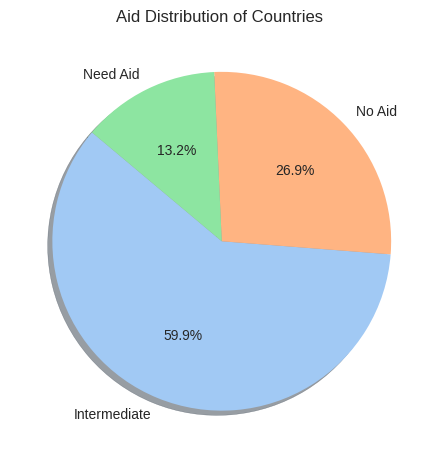

In [56]:
colors = sns.color_palette('pastel')
plt.pie(df1['Cluster'].value_counts(), labels=['Intermediate', 'No Aid', 'Need Aid'], colors = colors,autopct='%1.1f%%', startangle=140, shadow = True)
plt.title('Aid Distribution of Countries ')

plt.show()

The elbow method was used to determine an optimal number of clusters. Hyperparameter tuning through Grid search and Randomized SearchCV were used to optimize the model. Both these suggested that the optimal clusters be 9 clusters. However, testing 9 clusters as the optimal clusters yieled poor internal metrics (WCSS = 3.38 ; DBI = 0.791  ; SC = 0.315). Naturally, for 9 clusters, the WCSS is the best. However, this is expected beacuse as the number of clusters increase, the closer the data points are. There should be a tradeoff between closeness of the data points and the separation of clusters. Furtheremore, 9 clusters would be difficut to interpret.

The silouette score takes into account both cohesion and separation. Silhouette plot was drawn to investigate farther for the optimal clusters, hence three (3) clusters was selected.

From the dendogram, a reasonable cohesion (based on the length of the vertical line that will connect a cluster with a horizontal line ) can be seen around a distance of 1.5. This plot gives a SC that is similar to that of 3 clusters.


# 10. Conclusion

k-Means clustering with PCA was used to determine the underlying structure of the data. Three (3) clusters were determined with Cluster 2 being the cluster of countries in need of aid which was 13.2 % of all countries given from the HELP organization dataset.

Help can thus continue its plan for aid to the specific countries in the cluster.


#11. References


Banerji, A., 2021. K-Mean: Getting the Optimal Number of Clusters. [Online]
Available at: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
[Accessed September 2023].


Codefinity, 2023. Section 3. Chapter 1: Internal Evaluation. [Online]
Available at: https://codefinity.com/courses/v2/268f387f-1889-4fe2-8a2a-fe303599df5f/a15a6fd5-9e46-4acf-bf27-e055c38e4954/508a3fe1-955d-49d7-a2e5-6d0acf7b1b61


Data Camp, n.d. Data pre-processing for kmeans clustering. [Online]
Available at: https://s3.amazonaws.com/assets.datacamp.com/production/course_10628/slides/chapter3.pdf
[Accessed 20 September 2023].


Kaloyanova, E., 2021. 365 Data SCience: How to Combine PCA and K-means Clustering in Python?. [Online]
Available at: https://365datascience.com/tutorials/python-tutorials/pca-k-means/
[Accessed September 2023].
